In [33]:
from importlib import resources as impresources
from recurrent_health_events_prediction import configs
import json

import pandas as pd
import numpy as np

from recurrent_health_events_prediction.data_extraction.data_types import DiseaseType


## Importing Data

In [2]:
from recurrent_health_events_prediction.data_extraction.utils import assign_charlson_category


data_path = "/workspaces/master-thesis-recurrent-health-events-prediction/data/mimic-iii-dataset"

admissions_df = pd.read_csv(data_path + '/ADMISSIONS.csv')
diagnoses_icd_df = pd.read_csv(data_path + '/DIAGNOSES_ICD.csv')
diagnoses_codes_df = pd.read_csv(data_path + '/D_ICD_DIAGNOSES.csv')

disease_recurrence_df = pd.merge(diagnoses_icd_df.drop(columns=['ROW_ID', 'SUBJECT_ID']), admissions_df, on='HADM_ID', how='inner')
disease_recurrence_df = pd.merge(disease_recurrence_df, diagnoses_codes_df[['ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']], on='ICD9_CODE', how='inner')

disease_recurrence_df = assign_charlson_category(disease_recurrence_df, icd_column='ICD9_CODE')

In [3]:
disease_recurrence_df

,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID,SUBJECT_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,SHORT_TITLE,LONG_TITLE,COMORBIDITY
0,172335,1.0,40301,128,109,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,SINGLE,BLACK/AFRICAN AMERICAN,2141-09-18 07:06:00,2141-09-18 11:25:00,LEG PAIN,0,1,Mal hyp kid w cr kid V,"Hypertensive chronic kidney disease, malignant...",renal_disease
1,172335,2.0,486,128,109,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,SINGLE,BLACK/AFRICAN AMERICAN,2141-09-18 07:06:00,2141-09-18 11:25:00,LEG PAIN,0,1,"Pneumonia, organism NOS","Pneumonia, organism unspecified",other
2,172335,3.0,58281,128,109,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,SINGLE,BLACK/AFRICAN AMERICAN,2141-09-18 07:06:00,2141-09-18 11:25:00,LEG PAIN,0,1,Chr nephritis in oth dis,Chronic glomerulonephritis in diseases classif...,renal_disease
3,172335,4.0,5855,128,109,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,SINGLE,BLACK/AFRICAN AMERICAN,2141-09-18 07:06:00,2141-09-18 11:25:00,LEG PAIN,0,1,Chron kidney dis stage V,"Chronic kidney disease, Stage V",renal_disease
4,172335,5.0,4254,128,109,2141-09-18 10:32:00,2141-09-24 13:53:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,...,SINGLE,BLACK/AFRICAN AMERICAN,2141-09-18 07:06:00,2141-09-18 11:25:00,LEG PAIN,0,1,Prim cardiomyopathy NEC,Other primary cardiomyopathies,congestive_heart_failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634704,188195,2.0,20280,58190,97503,2146-07-22 12:41:00,2146-07-23 08:51:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,MARRIED,WHITE,2146-07-22 11:18:00,2146-07-22 14:12:00,LUDWIGS ANGINA,0,1,Oth lymp unsp xtrndl org,"Other malignant lymphomas, unspecified site, e...",malignant_cancer
634705,188195,3.0,V5869,58190,97503,2146-07-22 12:41:00,2146-07-23 08:51:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,MARRIED,WHITE,2146-07-22 11:18:00,2146-07-22 14:12:00,LUDWIGS ANGINA,0,1,Long-term use meds NEC,Long-term (current) use of other medications,other
634706,188195,4.0,V1279,58190,97503,2146-07-22 12:41:00,2146-07-23 08:51:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,MARRIED,WHITE,2146-07-22 11:18:00,2146-07-22 14:12:00,LUDWIGS ANGINA,0,1,Prsnl hst ot spf dgst ds,Personal history of other diseases of digestiv...,other
634707,188195,5.0,5275,58190,97503,2146-07-22 12:41:00,2146-07-23 08:51:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,MARRIED,WHITE,2146-07-22 11:18:00,2146-07-22 14:12:00,LUDWIGS ANGINA,0,1,Sialolithiasis,Sialolithiasis,other


In [4]:
mask = (disease_recurrence_df.SUBJECT_ID == 124)
disease_recurrence_df.loc[mask, ['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME', 'ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']].sort_values(by='ADMITTIME')

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,ICD9_CODE,SHORT_TITLE,LONG_TITLE
163,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,V4581,Aortocoronary bypass,Aortocoronary bypass status
161,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,49390,Asthma NOS,"Asthma, unspecified type, unspecified"
160,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,2720,Pure hypercholesterolem,Pure hypercholesterolemia
159,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,4019,Hypertension NOS,Unspecified essential hypertension
158,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,43320,Ocl vrtb art wo infrct,Occlusion and stenosis of vertebral artery wit...
157,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,436,Cva,"Acute, but ill-defined, cerebrovascular disease"
156,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,99812,Hematoma complic proc,Hematoma complicating a procedure
155,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,43331,Ocl mlt bi art w infrct,Occlusion and stenosis of multiple and bilater...
162,124,172461,2160-06-24 21:25:00,2160-07-15 15:10:00,41401,Crnry athrscl natve vssl,Coronary atherosclerosis of native coronary ar...
112,124,112906,2161-12-17 03:39:00,2161-12-24 15:35:00,4412,Thoracic aortic aneurysm,Thoracic aneurysm without mention of rupture


## Admission Types

<Axes: xlabel='ADMISSION_TYPE'>

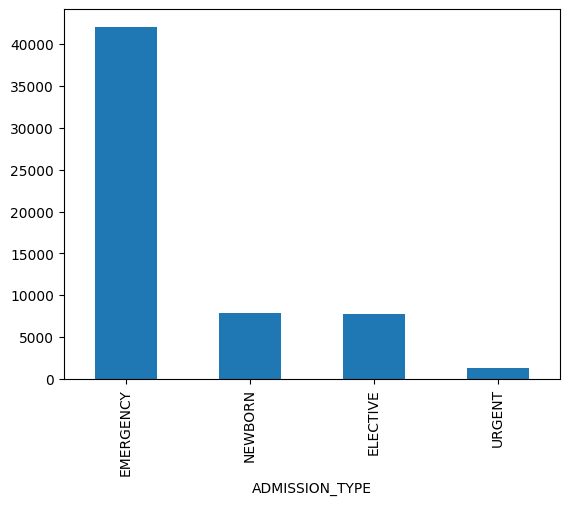

In [8]:
import matplotlib.pyplot as plt
admissions_df["ADMISSION_TYPE"].value_counts().plot(kind='bar')

## Visit Frequency Plots

### Chronic Pulmonary Diseases

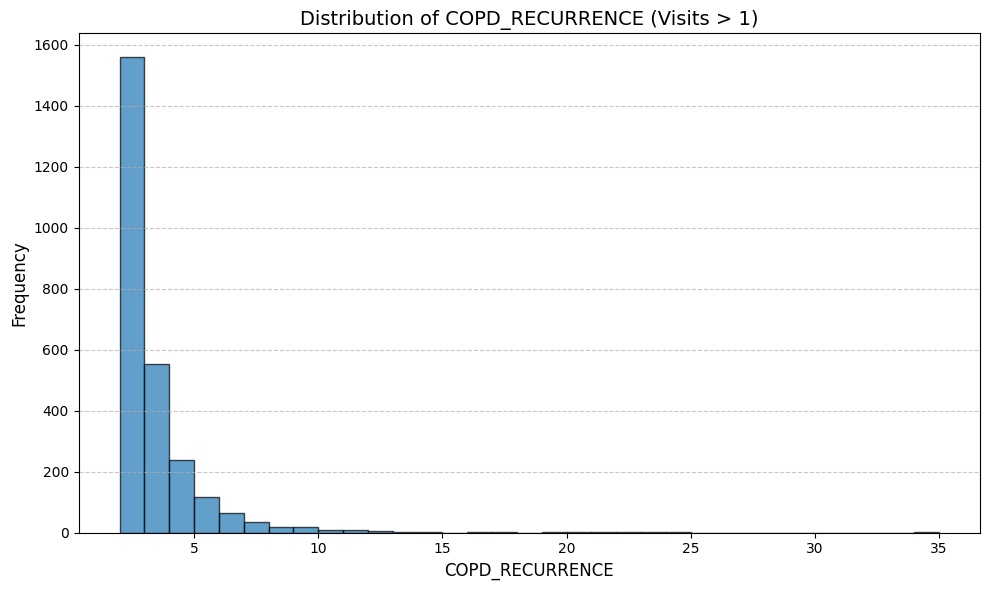

In [34]:
from utils import get_disease_recurrence

copd_recurrence_df = get_disease_recurrence(disease_recurrence_df, DiseaseType.CHRONIC_PULMONARY_DISEASE.value, 'COPD_RECURRENCE', 1)

In [32]:
avg = copd_recurrence_df['COPD_RECURRENCE'].mean()
print("Average number of COPD recurrences per patient:", avg)
print("Total number of patients with COPD diagnosis:", copd_recurrence_df['SUBJECT_ID'].nunique())

Average number of COPD recurrences per patient: 1.5826450955990496
Total number of patients with COPD diagnosis: 8839


### Heart Failure

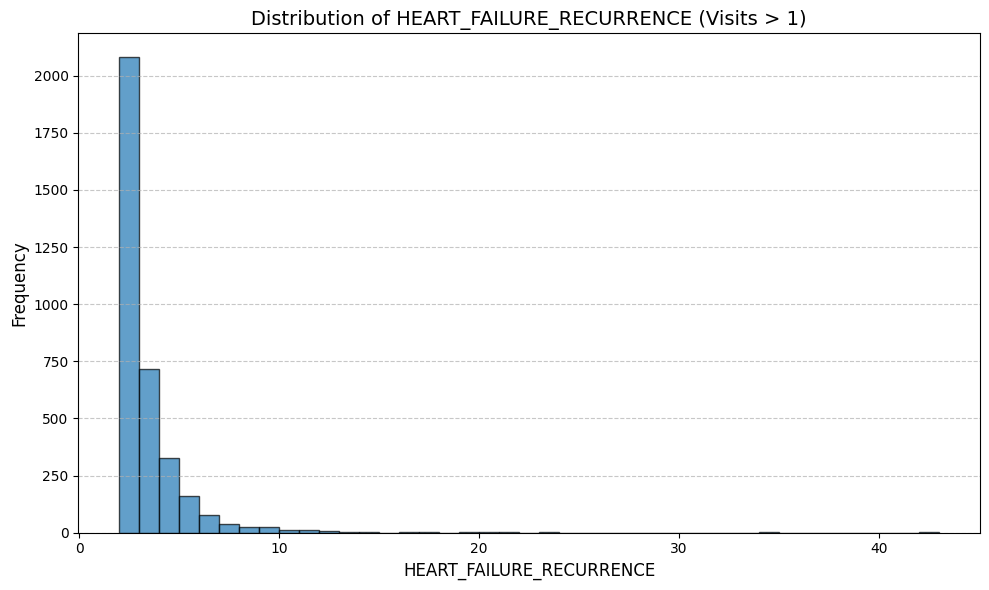

In [35]:
visits_heart_failure_df = get_disease_recurrence(disease_recurrence_df, DiseaseType.CONGESTIVE_HEART_FAILURE.value, 'HEART_FAILURE_RECURRENCE', 1)

In [29]:
avg = visits_heart_failure_df['HEART_FAILURE_RECURRENCE'].mean()
print("Average number of heart failure visits per patient:", avg)
print("Total number of patients with heart failure diagnosis:", visits_heart_failure_df['SUBJECT_ID'].nunique())

Average number of heart failure visits per patient: 1.622664311611044
Total number of patients with heart failure diagnosis: 10757


### Renal disease

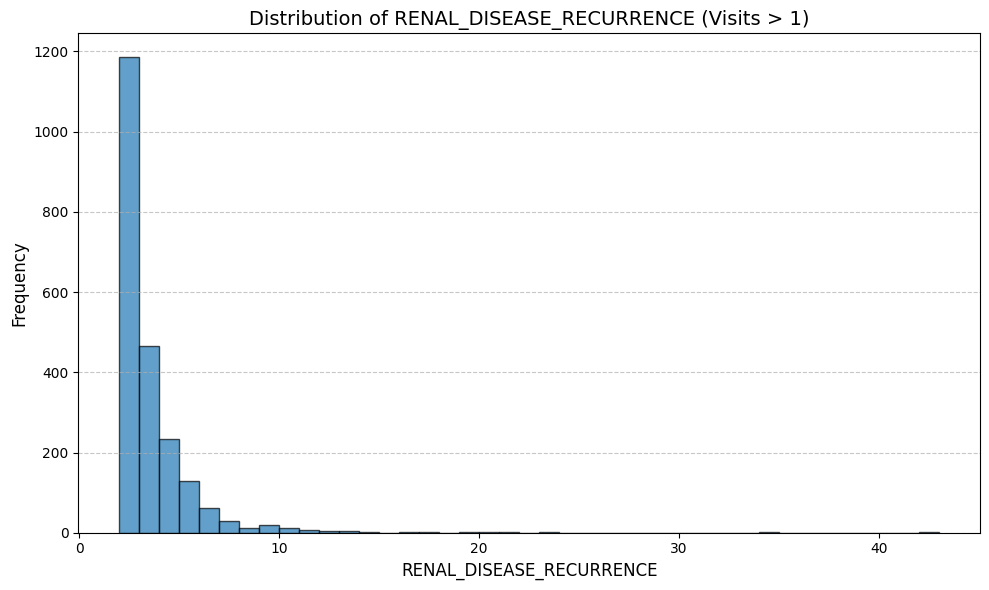

Average number of visits for renal disease diagnosis: 1.833151976786362
Total number of patients with renal disease diagnosis: 5514


In [36]:
visits_renal_disease_df = get_disease_recurrence(disease_recurrence_df, DiseaseType.RENAL_DISEASE.value, 'RENAL_DISEASE_RECURRENCE', 1)
avg = visits_renal_disease_df['RENAL_DISEASE_RECURRENCE'].mean()
print("Average number of visits for renal disease diagnosis:", avg)
print("Total number of patients with renal disease diagnosis:", visits_renal_disease_df['SUBJECT_ID'].nunique())

### Diabetes

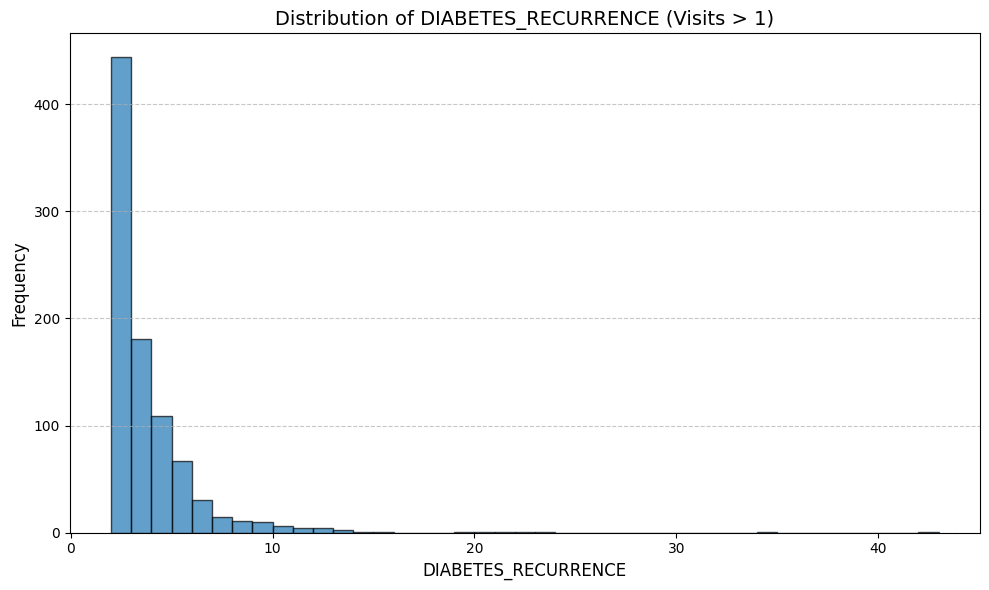

Average number of visits for patients with diabetes: 1.9972527472527473
Total number of patients with diabetes with complications diagnosis: 2184


In [37]:
visits_diabetes_df = get_disease_recurrence(disease_recurrence_df, DiseaseType.DIABETES_WITH_COMPLICATION.value, 'DIABETES_RECURRENCE', 1)
avg = visits_diabetes_df['DIABETES_RECURRENCE'].mean()
print("Average number of visits for patients with diabetes:", avg)
print("Total number of patients with diabetes with complications diagnosis:", visits_diabetes_df['SUBJECT_ID'].nunique())

### Cancer

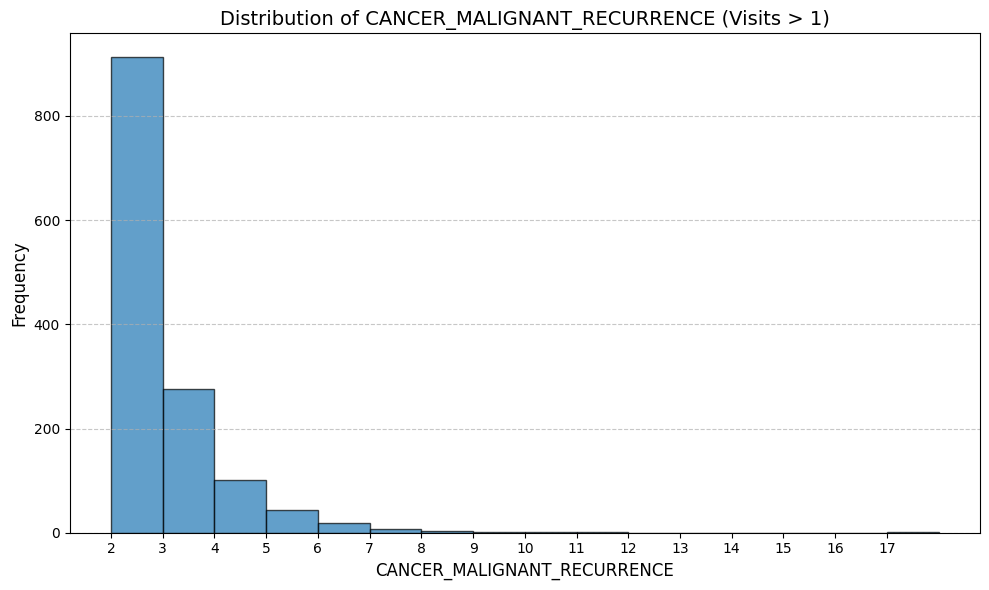

Average number of visits for patients with cancer_maligant: 1.4535347178518985
Total number of patients with cancer_maligant diagnosis: 4767


In [39]:
visits_cancer_maligant_df = get_disease_recurrence(disease_recurrence_df, DiseaseType.MALIGNANT_CANCER.value, 'CANCER_MALIGNANT_RECURRENCE', 1)
avg = visits_cancer_maligant_df['CANCER_MALIGNANT_RECURRENCE'].mean()
print("Average number of visits for patients with cancer_maligant:", avg)
print("Total number of patients with cancer_maligant diagnosis:", visits_cancer_maligant_df['SUBJECT_ID'].nunique())

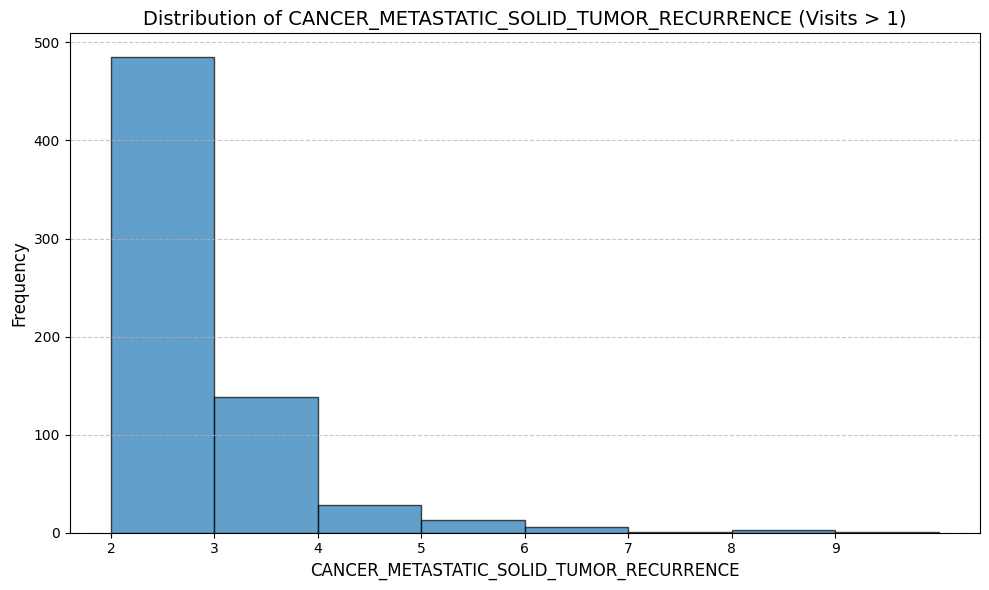

Average number of visits for patients with cancer metastatic solid tumor: 1.3721470019342359
Total number of patients with cancer metastatic solid tumor diagnosis: 2585


In [40]:
visits_cancer_metastatic_solid_tumor_df = get_disease_recurrence(disease_recurrence_df, DiseaseType.METASTATIC_SOLID_TUMOR.value, 'CANCER_METASTATIC_SOLID_TUMOR_RECURRENCE', 1)
avg = visits_cancer_metastatic_solid_tumor_df['CANCER_METASTATIC_SOLID_TUMOR_RECURRENCE'].mean()
print("Average number of visits for patients with cancer metastatic solid tumor:", avg)
print("Total number of patients with cancer metastatic solid tumor diagnosis:", visits_cancer_metastatic_solid_tumor_df['SUBJECT_ID'].nunique())